#  Coding Assignment #3 - Fraud Detection Models

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Paul's Code


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

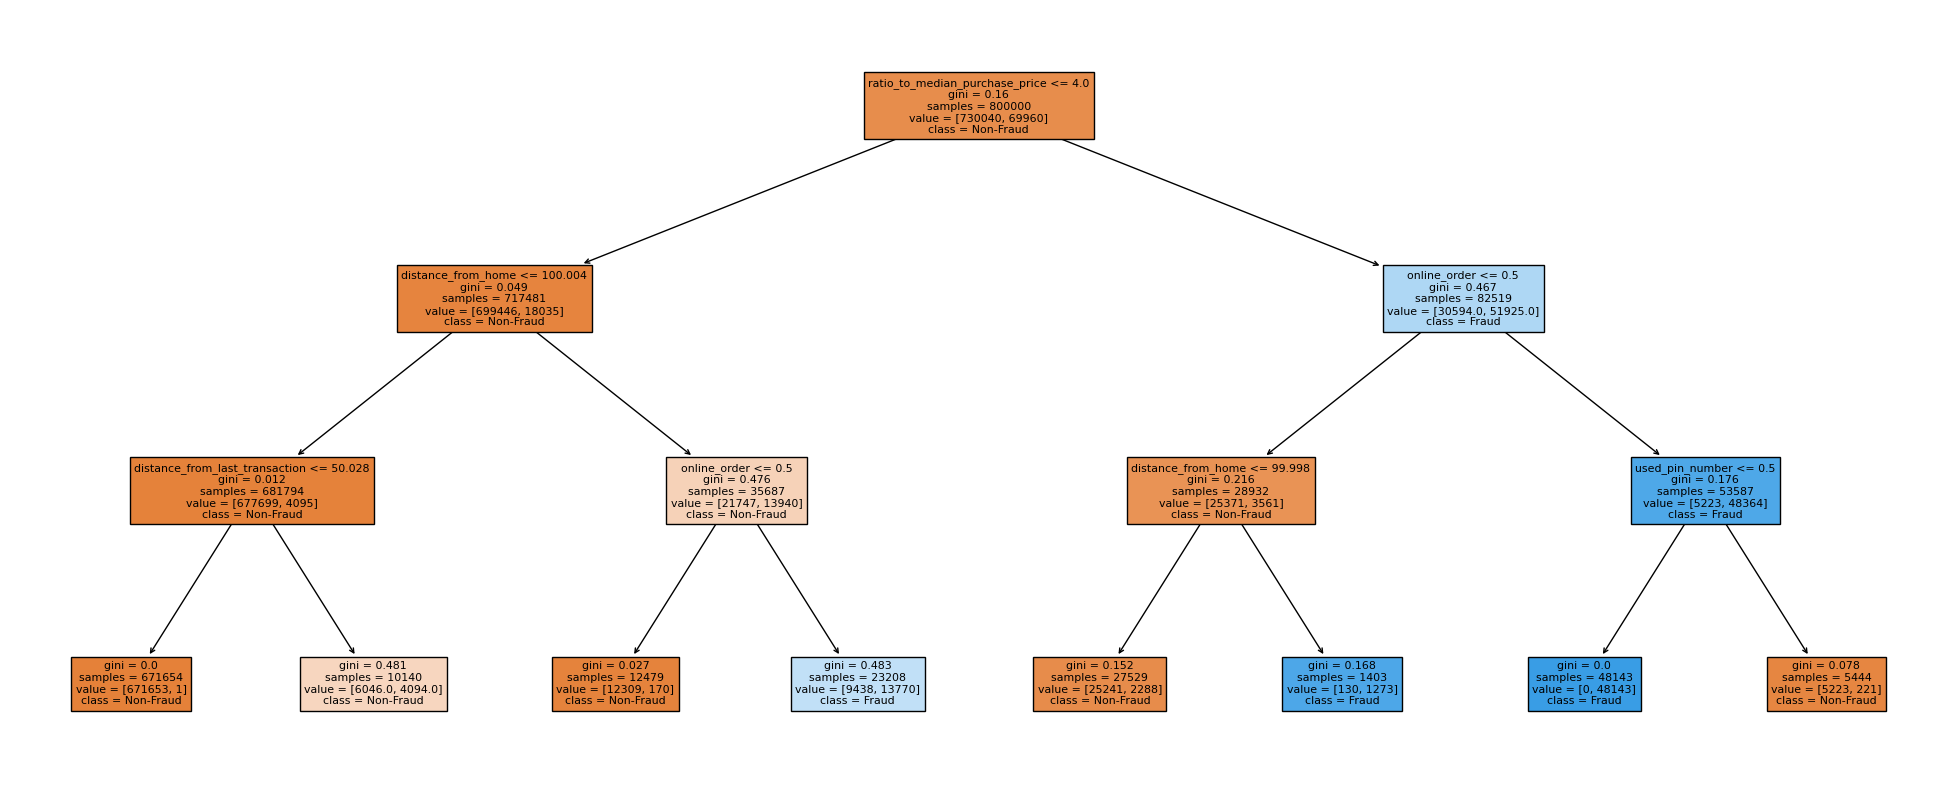

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
# url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
url = '/Users/aliesbak/Documents/GitHub/PlayGround/AI ML In Finance/Assignments/Assignment 3/card_transdata.csv'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model, 
          filled=True, 
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points

## Submission Guidelines
- Submit your work in a Jupyter Notebook or as a Python script with comments explaining your steps. You can also include your discussion in the notebook, as comments in your script, or in a separate text file.
- Ensure your plots and tables are clearly labeled and legible.

## Notes
- Be sure to demonstrate your understanding of the task and the models.


# Extra Credit: Advanced Model Enhancement and Evaluation

## Objective
Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.

## Tasks
1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.
2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.
3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.


Approach: 
1. import the data
2. 

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
# url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
url = '/Users/aliesbak/Documents/GitHub/PlayGround/AI ML In Finance/Assignments/Assignment 3/card_transdata.csv'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
data.head(5)


--- First 5 rows of data ---


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [12]:
data.groupby(level=0, axis=1).first()

C:\Users\AliEsbak\AppData\Local\Temp\ipykernel_38420\112662547.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=0, axis=1).first()


,distance_from_home,distance_from_last_transaction,fraud,online_order,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number
0,57.877857,0.311140,0.0,0.0,1.945940,1.0,1.0,0.0
1,10.829943,0.175592,0.0,0.0,1.294219,1.0,0.0,0.0
2,5.091079,0.805153,0.0,1.0,0.427715,1.0,0.0,0.0
3,2.247564,5.600044,0.0,1.0,0.362663,1.0,1.0,0.0
4,44.190936,0.566486,0.0,1.0,2.222767,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,0.0,0.0,1.626798,1.0,1.0,0.0
999996,19.872726,2.683904,0.0,0.0,2.778303,1.0,1.0,0.0
999997,2.914857,1.472687,0.0,1.0,0.218075,1.0,1.0,0.0
999998,4.258729,0.242023,0.0,1.0,0.475822,1.0,0.0,0.0


In [13]:
data.T.groupby(level=0).first()

,0,1,2,3,4,5,6,7,8,9,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999
distance_from_home,57.877857,10.829943,5.091079,2.247564,44.190936,5.586408,3.724019,4.848247,0.876632,8.839047,...,20.334489,26.807213,9.844674,4.846253,3.295884,2.207101,19.872726,2.914857,4.258729,58.108125
distance_from_last_transaction,0.311140,0.175592,0.805153,5.600044,0.566486,13.261073,0.956838,0.320735,2.503609,2.970512,...,11.437333,0.102574,0.250108,2.844450,0.085712,0.112651,2.683904,1.472687,0.242023,0.318110
fraud,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
online_order,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
ratio_to_median_purchase_price,1.945940,1.294219,0.427715,0.362663,2.222767,0.064768,0.278465,1.273050,1.516999,2.361683,...,0.699527,2.746114,0.814046,0.867740,0.831991,1.626798,2.778303,0.218075,0.475822,0.386920
repeat_retailer,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
used_pin_number,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [74]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [75]:
data.shape

(1000000, 8)

In [76]:
# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


--- Summary Statistics ---
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.0000

In [77]:
# We'll choose a different model as per the assignment : Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [78]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


--- Model Performance Metrics ---
Accuracy: 0.92
Confusion Matrix:
[[182557      0]
 [ 15714   1729]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    182557
         1.0       1.00      0.10      0.18     17443

    accuracy                           0.92    200000
   macro avg       0.96      0.55      0.57    200000
weighted avg       0.93      0.92      0.89    200000



#### <font color=blue>Decision Tree Classifier Results</font>
```python
--- Model Performance Metrics ---
Accuracy: 0.98
Confusion Matrix:
[[180076   2481]
 [  1646  15797]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182557
         1.0       0.86      0.91      0.88     17443

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000
```
#### <font color=blue>Random Forest Classifier Results</font>
```python
--- Model Performance Metrics ---
Accuracy: 0.92
Confusion Matrix:
[[182557      0]
 [ 15714   1729]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    182557
         1.0       1.00      0.10      0.18     17443

    accuracy                           0.92    200000
   macro avg       0.96      0.55      0.57    200000
weighted avg       0.93      0.92      0.89    200000

```

### <font color=blue>Evaluation Of Estimators - Conclusion</font>
```python
[ [TN, FP]
  [FN, TP] ]
```
results: 
- __accuracy__: measure of correct predictions over all predictions is a bit higher for decision tree classifier. This means cases of fraud are predicted more correctly over all other predictions when we use a non tuned decision tree vs a non tuned Random Forest Classifier. 
- __recall__: Decision Tree classifier is more correct in identifying true positive instances over total number of true positives and false negatives
- __confusion matrix__: Decision Tree classifier identifies more cases of true positive (15,797>12,143) which means it has made more correct predictions of fraud. I also has less cases of False Negatives. However it does a much better job at not classifying a case as a fraud when it isn't fraud. It's false positive cases are 0 << 2481 from the decision tree classifier. 
- __f1-score__: Decision Tree does better in the positive cases of fraud for f1 score.

Since the purpose of this exercise is to have a model that does better at detecting cases of fraud, Decision Tree seems to be a better model based on the results. Eventhough the Random Forest Classifier does better at reducing the number of false positives. Thoese false positives could be costly to the bank in terms of resources that would be needed to look into each case. more cases means more resources will need to be spent.

Random Forest might benefit from some hyperparameter tuning and time permitting I might try that. 

In [84]:
import seaborn as sns
data.columns


Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

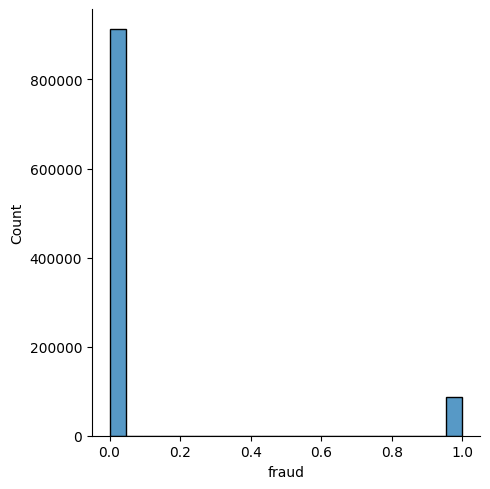

In [85]:
sns.displot(data,x='fraud')

### <font color=blue>Handling Imbalanced Data</font>
### <font color=blue>Using SMOTE</font>

In [45]:
# Before we use smote let's see how skewed the data is using bin count first
print(np.bincount(y_train))
# Event rate for y_train
print("\n--- Event Rate ---")
event_rate = y_train.mean() * 100
print(f'Event Rate: {event_rate:.2f}%')


[730040  69960]

--- Event Rate ---
Event Rate: 8.74%


In [46]:
# Now let's import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
smote_sampling = SMOTE(random_state=42)
# I'll use the same X_train and y_train as before 
X_smote, y_smote = smote_sampling.fit_resample(X_train, y_train)

In [47]:
# Before we use smote let's see how skewed the data is using bin count first
print(np.bincount(y_smote))
# Event rate for y_train
print("\n--- Event Rate ---")
event_rate = y_smote.mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

[730040 730040]

--- Event Rate ---
Event Rate: 50.00%


### <font color=blue>SMOTE Operation Result on Training Dataset</font>
We now have a training set that is evenly distributed. Let's train the model using this training set and see how the result is different. 

In [48]:
# Now let's train using this training set
model = RandomForestClassifier(n_estimators=100, max_depth=3)
model.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=3)

In [49]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


--- Model Performance Metrics ---
Accuracy: 0.99
Confusion Matrix:
[[180438   2119]
 [   134  17309]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    182557
         1.0       0.89      0.99      0.94     17443

    accuracy                           0.99    200000
   macro avg       0.95      0.99      0.97    200000
weighted avg       0.99      0.99      0.99    200000



#### <font color=blue>Random Forest Classifier Results With SMOTE</font>
#### <font color=blue>Non SMOTE Result</font>

```python
--- Model Performance Metrics ---
Accuracy: 0.97
Confusion Matrix:
[[182557      0]
 [  5327  12116]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    182557
         1.0       1.00      0.69      0.82     17443

    accuracy                           0.97    200000
   macro avg       0.99      0.85      0.90    200000
weighted avg       0.97      0.97      0.97    200000

```
#### <font color=blue>SMOTE Result</font>
```python
--- Model Performance Metrics ---
Accuracy: 0.99
Confusion Matrix:
[[180438   2119]
 [   134  17309]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    182557
         1.0       0.89      0.99      0.94     17443

    accuracy                           0.99    200000
   macro avg       0.95      0.99      0.97    200000
weighted avg       0.99      0.99      0.99    200000
```

#### <font color=blue>Analysis</font>
SMOTE increases the accuracy of the model but unfortunately it doesn't do well on recall which is what we are interested in for this application.

#### <font color=blue>Cross Validation</font>
There are a few options to choose from when implementing cross validation. I have imported all the models below from sklearn.model_selection library. 

In [52]:

from sklearn.model_selection import (
    TimeSeriesSplit,
    KFold,
    StratifiedKFold,
    GroupKFold,
    StratifiedGroupKFold
)
from sklearn.metrics import accuracy_score, roc_auc_score
sgk = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
# I'll create a funtion here for evaluating a model for cleaner use below
def evaluate_model(classifier, X_test, y_test):
    #Make prediction on the test data
    y_pred = classifier.predict(X_test)

    #Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    confusion = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    classification_rep = classification_report(y_test, y_pred)
    
    #Print the results
    print(f"Accuracy: {accuracy: .2f}")
    print(f"Area Under Curve: {auc_score: .2f}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_rep)

In [24]:
# Repeating the data import steps here for clarity
url = '/Users/aliesbak/Documents/GitHub/PlayGround/AI ML In Finance/Assignments/Assignment 3/card_transdata.csv'
def grab_data(url, target, features=None):
    data = pd.read_csv(url)
    X = data.drop(target, axis=1)
    y = data[target]
    return X, y
X, y = grab_data(url, 'fraud')
# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# pick the same model we picked above to be used in the cross validation below
model = RandomForestClassifier(n_estimators=100)

# create an object of stratified group k-fold
# Here stratified kfold creates indexes for test and training sets 
sgk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
def run_skfold(X_train, y_train):
    fold = 0
    for train_idx, test_idx in sgk.split(X_train, y_train):
        X_tr = X.loc[train_idx]
        y_tr = y.loc[train_idx]
        
        X_test = X.loc[test_idx]
        y_test = y.loc[test_idx]

        # Fit Model on Train
        model.fit(X_tr, y_tr)
        print(f"======= Fold {fold} ========")
        evaluate_model(model, X_test, y_test)
        fold += 1
run_skfold(X_train, y_train)

======= Fold 0 ========
Accuracy:  1.00
Area Under Curve:  1.00
Confusion Matrix:
[[146068      0]
 [     2  13930]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    146068
         1.0       1.00      1.00      1.00     13932

    accuracy                           1.00    160000
   macro avg       1.00      1.00      1.00    160000
weighted avg       1.00      1.00      1.00    160000

======= Fold 1 ========
Accuracy:  1.00
Area Under Curve:  1.00
Confusion Matrix:
[[146095      0]
 [     1  13904]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    146095
         1.0       1.00      1.00      1.00     13905

    accuracy                           1.00    160000
   macro avg       1.00      1.00      1.00    160000
weighted avg       1.00      1.00      1.00    160000

======= Fold 2 ========
Accuracy:  1.00
Area Under Curve:  1.00
Co

In [ ]:
# Now let's import SMOTE from imblearn library
# I'll use the same X_train and y_train as before 
X_smote, y_smote = smote_sampling.fit_resample(X_train, y_train)
print(X_smote.shape)
run_skfold(X_smote, y_smote)

#### <font color=blue>Further Analysis</font>
I would like to run this code with multiple classifiers and check to see how they'd do. I'll choose the following classifiers:
#### <font color=blue>Classifiers</font>
- **Decision Tree**
- **Random Forest Classifier**
- **Gradient Boosting Classifier**
- **Logisitic Regression**
- **xgboost classifier**
- **Support Vector Machine (SVM)**
- **K Nearest Neighbour Classifier**
#### <font color=blue>Metrics</font>
- **Accuracy:** The accuracy of the model tells us the proportion of correctly predicted instances out of the total instances.
- **Precision:** - Precision is the ratio of correctly predicted positive observations to the total predicted positives. For example if the precision is 0.75, it means that 75% of the transactions predicted as fraud are actually fraud.
- **Recall:** - Recall: Recall (also known as sensitivity or true positive rate) is the ratio of correctly predicted positive observations to all actual positives. For example if recall is 0.66 for a class (0,1=fraud), it means that 66% of the actual fraud transactions were correctly predicted.
- **F1-Score:** - The F1-score is the weighted average of Precision and Recall. It takes both false positives and false negatives into account.
- **ROC-AUC:** AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.
- **Custom Cost Metric:** 
I would also like to add a metric of my own. For that I create a 'custom_cost' function that associates a cost to both false positives and false negatives. I am associating more cost to false negatives as those are the cases of fraud that haven't been detected. I am also associating a cost to false positives because there will be some cost associated dealing those as well, but I'm assuming those costs are on average a lot less than false negatives.
#### <font color=blue>Workflow</font>
Here's what I'll do:
- Read in the data as usual
- Prepare X and y
- scale the features using Standard Scaler from sklearn.preprocessing
- Define a dictionary that holds the classifiers that I mentioned above
- Define the metrics that I would like to judge all the classifiers with
- for each classifier selected, run stratified k fold cross validation with the metrics defined and report on the results and save results to file.

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer

# Load the dataset
url = 'card_transdata.csv'
data = pd.read_csv(url)

# Define features (X) and target (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(n_estimators=100),
    # "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Custom cost function considering the cost of false positives and false negatives
def custom_cost(y_true, y_pred):
    fp_cost = 10  # Cost of False Positives
    fn_cost = 100  # Cost of False Negatives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    total_cost = (fp_cost * fp + fn_cost * fn) / (1)
    return total_cost

custom_scorer_01 = make_scorer(custom_cost, greater_is_better=False)

# Evaluation metrics
metrics = {
    "Accuracy"      : 'accuracy',
    "Precision"     : 'precision',
    "Recall"        : 'recall',
    "F1-Score"      : 'f1',
    "ROC-AUC"       : 'roc_auc',
    "Custom Cost"   : custom_scorer_01
}

# Perform cross-validation with stratified K-Folds (5 folds)
k_folds = 5
results = {}

for clf_name, clf in classifiers.items():
    print(f"\n--- {clf_name} ---")
    fold_results = {"Model": [], "Metric": [], "Score": []}
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    for metric_name, metric_func in metrics.items():
        scores = cross_val_score(clf, X_scaled, y, cv=skf, scoring=metric_func, n_jobs=1)
        avg_score = np.mean(scores)
        print(f"{metric_name}: {avg_score:.4f}")
        fold_results["Model"].extend([clf_name] * k_folds)
        fold_results["Metric"].extend([metric_name] * k_folds)
        fold_results["Score"].extend(scores)
    results[clf_name] = pd.DataFrame(fold_results)

# Combine results into a single DataFrame
final_results = pd.concat(results.values(), ignore_index=True)

# Save results to a CSV file
final_results.to_csv("fraud_detection_results.csv", index=False)

print("\n--- Results Saved to fraud_detection_results.csv ---")



--- Decision Tree ---
Accuracy: 0.9794
Precision: 0.8664
Recall: 0.9037
F1-Score: 0.8846
ROC-AUC: 0.9960
Custom Cost: -192778.0000

--- Random Forest ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9999
F1-Score: 0.9999
ROC-AUC: 1.0000
Custom Cost: -180.0000

--- Gradient Boosting ---
Accuracy: 0.9997
Precision: 0.9994
Recall: 0.9973


KeyboardInterrupt: 

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))
metrics_to_plot = list(metrics.keys())
for metric_name in metrics_to_plot:
    metric_df = final_results[final_results['Metric'] == metric_name]
    plt.bar(metric_df['Model'], metric_df['Score'], label=metric_name)

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Comparison of Classifier Performance')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### <font color=blue>Need More Resources</font>

This code is running very slowly. I'll change approach to what I have below. I think the code above could possibly benefit from some of the changes I'll be making below. I'll explain the process in a later section.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import (accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix,
                             classification_report,
                             make_scorer)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
# Classifier Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import pickle
# Repeating the data import steps here for clarity
url = 'card_transdata.csv'
def grab_data(url, target, features=None):
    data = pd.read_csv(url)
    X = data.drop(target, axis=1)
    y = data[target]
    return X, y

X, y = grab_data(url, 'fraud')

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# pick the same model we picked above to be used in the cross validation below
model = RandomForestClassifier(n_estimators=100)

# Custom cost function considering the cost of false positives and false negatives
def custom_cost(y_true, y_pred):
    fp_cost = 10  # Cost of False Positives
    fn_cost = 100  # Cost of False Negatives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    total_cost = (fp_cost * fp + fn_cost * fn) / (1)  # maybe think about how to scale later
    return total_cost

custom_scorer_01 = make_scorer(custom_cost, greater_is_better=False)

# evaluate the model and return a dictionary with some common metrics
def evaluate_model(classifier, X_test, y_test, print_enable=False):
    # Make prediction on the test data
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy            = accuracy_score(y_test, y_pred)
    precision           = precision_score(y_test, y_pred)
    recall              = recall_score(y_test, y_pred)
    f1                  = f1_score(y_test, y_pred)
    auc_score           = roc_auc_score(y_test, y_pred)
    confusion           = confusion_matrix(y_test, y_pred)
    weighted_fn_score   = custom_cost(y_test, y_pred)

    classification_rep  = classification_report(y_test, y_pred)
    eval_result = \
        {
        "Accuracy"      : accuracy,
        "Precision"     : precision,
        "Recall"        : recall,
        "F1-Score"      : f1,
        "ROC-AUC"       : auc_score,
        "Confusion"     : confusion,
        "Custom Cost"   : weighted_fn_score,
        }
    
    if print:
        # Print the results
        print(f"Accuracy: {accuracy: .2f}")
        print(f"Area Under Curve: {auc_score: .2f}")
        print("Confusion Matrix:")
        print(confusion)
        print("Weighted FN Score:")
        print(weighted_fn_score)

        print("Classification Report:")
        print(classification_rep)
    
    return eval_result

# Perform stratified k-fold on 
def run_skfold(skf:StratifiedKFold, model, X_train, y_train):
    fold = 0
    dashes = 17*"="
    results = {}
    for train_idx, test_idx in skf.split(X_train, y_train):
        X_tr = X.loc[train_idx]
        y_tr = y.loc[train_idx]
        
        X_test = X.loc[test_idx]
        y_test = y.loc[test_idx]

        # Fit Model on Train
        model.fit(X_tr, y_tr)
        print(f"{dashes} Fold {fold} {dashes}")
        scores = evaluate_model(model, X_test, y_test, True)
        # prepare results with the appropriate metrics scores for each fold
        results.update({f'fold {fold}' :{ "model": model, 'scores':scores}})
        fold += 1
    return results

classifiers = {
    "Decision Tree"         : DecisionTreeClassifier(max_depth=3),
    "Random Forest"         : RandomForestClassifier(n_estimators=100),
    "Gradient Boosting"     : GradientBoostingClassifier(n_estimators=100),
    "Logistic Regression"   : LogisticRegression(),
    "XGBoost"               : XGBClassifier(n_estimators=100),
    "SVM"                   : SVC(kernel='rbf', probability=True),
    "KNN"                   : KNeighborsClassifier(n_neighbors=5)
}

def result_comp_prep(results):
    pass

filename = 'AI ML In Finance/Assignments/Assignment 3/cross_validation_results.sav'

# Main function to run the cross validation for multiple classifiers, 
# This function 
def run_skf_cv_on_classifiers(classifiers, k_folds, save_path=None):
    # grab data
    X, y = grab_data(url, 'fraud')
    
    # Split the dataset into training and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # define stratified k fold
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Run each classifier on the same slice of data provided by skf
    # save and print out the results for each classifier for further analysis
    skf_cv_results_on_classifiers = {}
    for classifier_name, classifier in classifiers.items():
        print(f"\n{'='*17} {classifier_name} {'='*17}")
        models = run_skfold(skf, classifier, X_train=X_train, y_train=y_train)
        skf_cv_results_on_classifiers.update({classifier_name:models})
    print(skf_cv_results_on_classifiers)
    # save the model to disk
    with open(save_path, 'wb') as pf:
        pickle.dump(skf_cv_results_on_classifiers, pf)

    return skf_cv_results_on_classifiers

run_skf_cv_on_classifiers = run_skf_cv_on_classifiers(classifiers=classifiers, k_folds=5, save_path=filename)


================= Decision Tree =================
================= Fold 0 =================
Accuracy:  0.98
Area Under Curve:  0.95
Confusion Matrix:
[[144079   1989]
 [  1340  12592]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    146068
         1.0       0.86      0.90      0.88     13932

    accuracy                           0.98    160000
   macro avg       0.93      0.95      0.94    160000
weighted avg       0.98      0.98      0.98    160000

================= Fold 1 =================
Accuracy:  0.98
Area Under Curve:  0.94
Confusion Matrix:
[[144113   1982]
 [  1383  12522]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    146095
         1.0       0.86      0.90      0.88     13905

    accuracy                           0.98    160000
   macro avg       0.93      0.94      0.94    160000
weighted avg       0.98      0.9

c:\Users\AliEsbak\Documents\GitHub\PlayGround\jenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


================= Fold 0 =================
Accuracy:  0.96
Area Under Curve:  0.79
Confusion Matrix:
[[145082    986]
 [  5696   8236]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    146068
         1.0       0.89      0.59      0.71     13932

    accuracy                           0.96    160000
   macro avg       0.93      0.79      0.84    160000
weighted avg       0.96      0.96      0.95    160000



c:\Users\AliEsbak\Documents\GitHub\PlayGround\jenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


================= Fold 1 =================
Accuracy:  0.96
Area Under Curve:  0.80
Confusion Matrix:
[[145049   1046]
 [  5487   8418]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    146095
         1.0       0.89      0.61      0.72     13905

    accuracy                           0.96    160000
   macro avg       0.93      0.80      0.85    160000
weighted avg       0.96      0.96      0.96    160000



c:\Users\AliEsbak\Documents\GitHub\PlayGround\jenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


================= Fold 2 =================
Accuracy:  0.96
Area Under Curve:  0.79
Confusion Matrix:
[[144973    971]
 [  5904   8152]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    145944
         1.0       0.89      0.58      0.70     14056

    accuracy                           0.96    160000
   macro avg       0.93      0.79      0.84    160000
weighted avg       0.95      0.96      0.95    160000



c:\Users\AliEsbak\Documents\GitHub\PlayGround\jenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


================= Fold 3 =================
Accuracy:  0.96
Area Under Curve:  0.79
Confusion Matrix:
[[144876   1020]
 [  5806   8298]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    145896
         1.0       0.89      0.59      0.71     14104

    accuracy                           0.96    160000
   macro avg       0.93      0.79      0.84    160000
weighted avg       0.96      0.96      0.95    160000



c:\Users\AliEsbak\Documents\GitHub\PlayGround\jenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


================= Fold 4 =================
Accuracy:  0.96
Area Under Curve:  0.80
Confusion Matrix:
[[145036   1059]
 [  5574   8331]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    146095
         1.0       0.89      0.60      0.72     13905

    accuracy                           0.96    160000
   macro avg       0.93      0.80      0.85    160000
weighted avg       0.96      0.96      0.95    160000


================= XGBoost =================
================= Fold 0 =================
Accuracy:  1.00
Area Under Curve:  1.00
Confusion Matrix:
[[145915    153]
 [   107  13825]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    146068
         1.0       0.99      0.99      0.99     13932

    accuracy                           1.00    160000
   macro avg       0.99      1.00      0.99    160000
weighted avg       1.00      1.00     

#### <font color=blue>SVM Is taking too long - Resource Issues?</font>
SVM seems to be very slow. I will have to stop the code after leaving it to run in the background and observing it every so often that it hasn't finished in 90 minutes and most of that time it has been stuck on SVM. 

I'll have to read in to SVM and see if I'm doing something wrong, or if this is usually how long SVM takes. I might change the kernel from 'rbf' as some suggest on the internet and try again. It is taking too long for this applicatoin and as a result I will take it out of the fold. Pun intended.

Here's how that looks below:

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import (accuracy_score, 
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix,
                             classification_report,
                             make_scorer)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
# Classifier Imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import pickle
# Repeating the data import steps here for clarity
url = 'card_transdata.csv'
def grab_data(url, target, features=None):
    data = pd.read_csv(url)
    X = data.drop(target, axis=1)
    y = data[target]
    return X, y

X, y = grab_data(url, 'fraud')

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# pick the same model we picked above to be used in the cross validation below
model = RandomForestClassifier(n_estimators=100)

# Custom cost function considering the cost of false positives and false negatives
def custom_cost(y_true, y_pred):
    fp_cost = 10  # Cost of False Positives
    fn_cost = 100  # Cost of False Negatives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    total_cost = (fp_cost * fp + fn_cost * fn) / (1)  # maybe think about how to scale later
    return total_cost

custom_scorer_01 = make_scorer(custom_cost, greater_is_better=False)

# evaluate the model and return a dictionary with some common metrics
def evaluate_model(classifier, X_test, y_test, print_enable=False):
    # Make prediction on the test data
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy            = accuracy_score(y_test, y_pred)
    precision           = precision_score(y_test, y_pred)
    recall              = recall_score(y_test, y_pred)
    f1                  = f1_score(y_test, y_pred)
    auc_score           = roc_auc_score(y_test, y_pred)
    confusion           = confusion_matrix(y_test, y_pred)
    weighted_fn_score   = custom_cost(y_test, y_pred)

    classification_rep  = classification_report(y_test, y_pred)
    eval_result = \
        {
        "Accuracy"      : accuracy,
        "Precision"     : precision,
        "Recall"        : recall,
        "F1-Score"      : f1,
        "ROC-AUC"       : auc_score,
        "Confusion"     : confusion,
        "Custom Cost"   : weighted_fn_score,
        }
    
    if print:
        # Print the results
        print(f"Accuracy            : {accuracy: .2f}")
        print(f"Area Under Curve    : {auc_score: .2f}")
        print("Confusion Matrix:")
        print(confusion)
        print(f"Weighted FN Score   : {weighted_fn_score}")
        print("Classification Report:")
        print(classification_rep)
    
    return eval_result

# Perform stratified k-fold on 
def run_skfold(skf:StratifiedKFold, model, X_train, y_train):
    fold = 0
    dashes = 17*"="
    results = {}
    for train_idx, test_idx in skf.split(X_train, y_train):
        X_tr = X.loc[train_idx]
        y_tr = y.loc[train_idx]
        
        X_test = X.loc[test_idx]
        y_test = y.loc[test_idx]

        # Fit Model on Train
        model.fit(X_tr, y_tr)
        print(f"{dashes} Fold {fold} {dashes}")
        scores = evaluate_model(model, X_test, y_test, True)
        # prepare results with the appropriate metrics scores for each fold
        results.update({f'fold {fold}' :{ "model": model, 'scores':scores}})
        fold += 1
    return results

classifiers = {
    "Decision Tree"         : DecisionTreeClassifier(max_depth=3),
    "Random Forest"         : RandomForestClassifier(n_estimators=100),
    "Gradient Boosting"     : GradientBoostingClassifier(n_estimators=100),
    "Logistic Regression"   : LogisticRegression(),
    "XGBoost"               : XGBClassifier(n_estimators=100),
    # "SVM"                   : SVC(kernel='rbf', probability=True),
    "KNN"                   : KNeighborsClassifier(n_neighbors=5)
}

def result_comp_prep(results):
    pass

# Main function to run the cross validation for multiple classifiers, 
# This function 
def run_skf_cv_on_classifiers(classifiers, k_folds, save_path=None):
    # grab data
    X, y = grab_data(url, 'fraud')
    
    # Split the dataset into training and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # define stratified k fold
    skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Run each classifier on the same slice of data provided by skf
    # save and print out the results for each classifier for further analysis
    results_skf_cv_on_classifiers = {}
    for classifier_name, classifier in classifiers.items():
        print(f"\n{'='*17} {classifier_name} {'='*17}")
        models = run_skfold(skf, classifier, X_train=X_train, y_train=y_train)
        results_skf_cv_on_classifiers.update({classifier_name:models})

    return results_skf_cv_on_classifiers

results_skf_cv_on_classifiers = run_skf_cv_on_classifiers(classifiers=classifiers, k_folds=5, save_path=filename)


================= Decision Tree =================
================= Fold 0 =================
Accuracy            :  0.98
Area Under Curve    :  0.95
Confusion Matrix:
[[144079   1989]
 [  1340  12592]]
Weighted FN Score   : 153890.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    146068
         1.0       0.86      0.90      0.88     13932

    accuracy                           0.98    160000
   macro avg       0.93      0.95      0.94    160000
weighted avg       0.98      0.98      0.98    160000

================= Fold 1 =================
Accuracy            :  0.98
Area Under Curve    :  0.94
Confusion Matrix:
[[144113   1982]
 [  1383  12522]]
Weighted FN Score   : 158120.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    146095
         1.0       0.86      0.90      0.88     13905

    accuracy                           0.98   

c:\Users\AliEsbak\Documents\GitHub\PlayGround\jenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


================= Fold 0 =================
Accuracy            :  0.96
Area Under Curve    :  0.79
Confusion Matrix:
[[145082    986]
 [  5696   8236]]
Weighted FN Score   : 579460.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    146068
         1.0       0.89      0.59      0.71     13932

    accuracy                           0.96    160000
   macro avg       0.93      0.79      0.84    160000
weighted avg       0.96      0.96      0.95    160000



c:\Users\AliEsbak\Documents\GitHub\PlayGround\jenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


================= Fold 1 =================
Accuracy            :  0.96
Area Under Curve    :  0.80
Confusion Matrix:
[[145049   1046]
 [  5487   8418]]
Weighted FN Score   : 559160.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    146095
         1.0       0.89      0.61      0.72     13905

    accuracy                           0.96    160000
   macro avg       0.93      0.80      0.85    160000
weighted avg       0.96      0.96      0.96    160000



c:\Users\AliEsbak\Documents\GitHub\PlayGround\jenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


================= Fold 2 =================
Accuracy            :  0.96
Area Under Curve    :  0.79
Confusion Matrix:
[[144973    971]
 [  5904   8152]]
Weighted FN Score   : 600110.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    145944
         1.0       0.89      0.58      0.70     14056

    accuracy                           0.96    160000
   macro avg       0.93      0.79      0.84    160000
weighted avg       0.95      0.96      0.95    160000



c:\Users\AliEsbak\Documents\GitHub\PlayGround\jenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


================= Fold 3 =================
Accuracy            :  0.96
Area Under Curve    :  0.79
Confusion Matrix:
[[144876   1020]
 [  5806   8298]]
Weighted FN Score   : 590800.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    145896
         1.0       0.89      0.59      0.71     14104

    accuracy                           0.96    160000
   macro avg       0.93      0.79      0.84    160000
weighted avg       0.96      0.96      0.95    160000



c:\Users\AliEsbak\Documents\GitHub\PlayGround\jenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


================= Fold 4 =================
Accuracy            :  0.96
Area Under Curve    :  0.80
Confusion Matrix:
[[145036   1059]
 [  5574   8331]]
Weighted FN Score   : 567990.0
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    146095
         1.0       0.89      0.60      0.72     13905

    accuracy                           0.96    160000
   macro avg       0.93      0.80      0.85    160000
weighted avg       0.96      0.96      0.95    160000


================= XGBoost =================
================= Fold 0 =================
Accuracy            :  1.00
Area Under Curve    :  1.00
Confusion Matrix:
[[145915    153]
 [   107  13825]]
Weighted FN Score   : 12230.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    146068
         1.0       0.99      0.99      0.99     13932

    accuracy                           1.00    160000

In [5]:
# I'll pickle the results so I can handily access them without running the code again
def save_results_to_file(result, save_path):
    # save the model to disk
    with open(save_path, 'wb') as pf:
        pickle.dump(result, pf)

filename = 'results_skf_cv_on_classifiers.sav'
save_results_to_file(results_skf_cv_on_classifiers, filename)

#### <font color=blue>Analysis And Model Selection</font>
I'll compare the results of the models below based on each of the following metrics (copied from above):
#### <font color=blue>Metrics</font>
- **Accuracy:** The accuracy of the model tells us the proportion of correctly predicted instances out of the total instances.
- **Precision:** - Precision is the ratio of correctly predicted positive observations to the total predicted positives. For example if the precision is 0.75, it means that 75% of the transactions predicted as fraud are actually fraud.
- **Recall:** - Recall: Recall (also known as sensitivity or true positive rate) is the ratio of correctly predicted positive observations to all actual positives. For example if recall is 0.66 for a class (0,1=fraud), it means that 66% of the actual fraud transactions were correctly predicted.
- **F1-Score:** - The F1-score is the weighted average of Precision and Recall. It takes both false positives and false negatives into account.
- **ROC-AUC:** AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.
- **Custom Cost Metric:** 
I would also like to add a metric of my own. For that I create a 'custom_cost' function that associates a cost to both false positives and false negatives. I am associating more cost to false negatives as those are the cases of fraud that haven't been detected. I am also associating a cost to false positives because there will be some cost associated dealing those as well, but I'm assuming those costs are on average a lot less than false negatives.

#### <font color=blue>Approach</font>
- **Results**: I have organized the data from the cross validation to include each classifier that was used and nested within there is each fold and the actual model object, along with scores associated to that fold and model. The idea is to have every metric that I think I need in this stage, in one data structure to make post-process analysis easier. 

```python
results = 
{'Decision Tree': 
       {'fold 0': 
              {'model': DecisionTreeClassifier(max_depth=3),
              'scores': 
                     {'Accuracy': 0.97919375,
                     'Precision': 0.8635896029078939,
                     'Recall': 0.9038185472293999,
                     'F1-Score': 0.8832462385578508,
                     'ROC-AUC': 0.945100800848591,
                     'Confusion': array([[144079,   1989],
                            [  1340,  12592]], dtype=int64),
                     'Custom Cost': 153890.0}},
       'fold 1': 
              {'model': DecisionTreeClassifier(max_depth=3),
              'scores': 
                     {'Accuracy': 0.97896875,
                     'Precision': 0.8633480419194705,
                     'Recall': 0.9005393743257821,
                     'F1-Score': 0.8815516209651871,
                     'ROC-AUC': 0.9434864296934362,
                     'Confusion': array([[144113,   1982],
                            [  1383,  12522]], dtype=int64),
                     'Custom Cost': 158120.0}},
...
```
- **Saved as Pickle**: This data is then saved to file as a binary using pickle. It is saved to file for easier access and to enable analysis wihtout running the cross validatin code again. 
- **Load to python from Pickle**: This data is then loaded into python environment using pickle. 
- **Results Dataframe**: I then create a dataframe from the results to prepare for the next steps of analysis like graphing and calulating mean, plotting ROC curve, precission-recall curve and so on if necessary. 
- **Scores Plot**: I then create a plot of the mean of each metric score for each model and compare them on a bar graph. 
- **Feature Importance:** I would also create graphs of feature importance of the various models by taking the mean of each feature importance for each model.

In [1]:
import pickle
with open('results_skf_cv_on_classifiers.sav', 'rb') as input_file:
    results_00 = pickle.load(input_file)

/Users/aliesbak/Documents/GitHub/PlayGround/aimlenv/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/aliesbak/Documents/GitHub/PlayGround/aimlenv/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/aliesbak/Documents/GitHub/PlayGround/aimlenv/lib/python3.12/site-packages/sklearn/base.py:376: In

In [29]:
# Create a dataframe for the results making columns for each score

# Initialize lists to store data
model_list = []
fold_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
custom_cost_list = []
false_positive_list = []
false_negative_list = []
true_positive_list = []
true_negative_list = []

# Iterate over models, folds, and scores
for model, folds in results_00.items():
    for fold, scores in folds.items():
        model_list.append(model)
        fold_list.append(fold)
        scores_data = scores['scores']
        accuracy_list.append(scores_data['Accuracy'])
        precision_list.append(scores_data['Precision'])
        recall_list.append(scores_data['Recall'])
        f1_list.append(scores_data['F1-Score'])
        roc_auc_list.append(scores_data['ROC-AUC'])
        custom_cost_list.append(scores_data['Custom Cost'])
        
        # Extract values from confusion matrix
        confusion_matrix = scores_data['Confusion']
        tn, fp, fn, tp = confusion_matrix.ravel()
        true_negative_list.append(tn)
        false_positive_list.append(fp)
        false_negative_list.append(fn)
        true_positive_list.append(tp)

# Create DataFrame
df_skf_cv_results = pd.DataFrame({
    'Model': model_list,
    'Fold': fold_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_list,
    'ROC-AUC': roc_auc_list,
    'Custom Cost': custom_cost_list,
    'True Positive': true_positive_list,
    'False Positive': false_positive_list,
    'True Negative': true_negative_list,
    'False Negative': false_negative_list
})

# Display DataFrame
df_skf_cv_results.head(20)



,Model,Fold,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Custom Cost,True Positive,False Positive,True Negative,False Negative
0,Decision Tree,fold 0,0.979194,0.863590,0.903819,0.883246,0.945101,153890.0,12592,1989,144079,1340
1,Decision Tree,fold 1,0.978969,0.863348,0.900539,0.881552,0.943486,158120.0,12522,1982,144113,1383
2,Decision Tree,fold 2,0.979631,0.868322,0.905450,0.886497,0.946113,152200.0,12727,1930,144014,1329
3,Decision Tree,fold 3,0.979387,0.865760,0.906764,0.885788,0.946586,151330.0,12789,1983,143913,1315
4,Decision Tree,fold 4,0.979206,0.863905,0.902985,0.883013,0.944723,154680.0,12556,1978,144117,1349
5,Random Forest,fold 0,0.999994,1.000000,0.999928,0.999964,0.999964,100.0,13931,0,146068,1
6,Random Forest,fold 1,0.999994,1.000000,0.999928,0.999964,0.999964,100.0,13904,0,146095,1
7,Random Forest,fold 2,0.999994,1.000000,0.999929,0.999964,0.999964,100.0,14055,0,145944,1
8,Random Forest,fold 3,0.999975,1.000000,0.999716,0.999858,0.999858,400.0,14100,0,145896,4
9,Random Forest,fold 4,0.999988,1.000000,0.999856,0.999928,0.999928,200.0,13903,0,146095,2


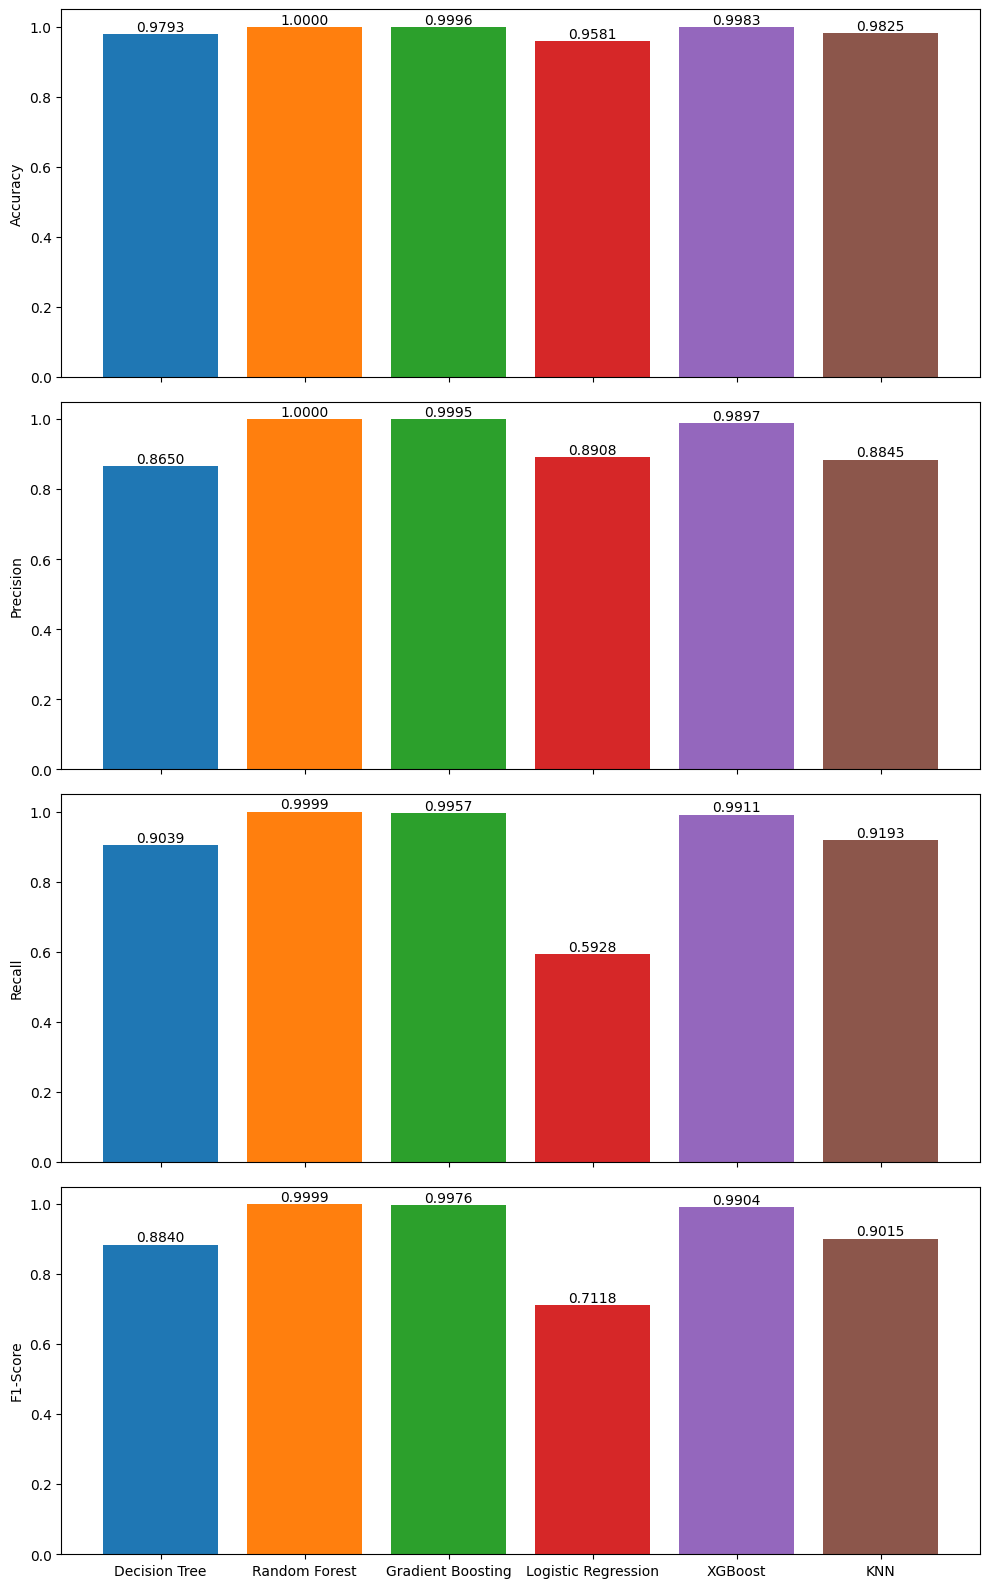

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and evaluation metrics
models = df_skf_cv_results['Model'].unique()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Create subplots for each metric
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 16), sharex=True)

# Iterate over each metric and plot
for i, metric in enumerate(metrics):
    ax = axs[i]
    # Plot each model's metric value
    for model in models:
        model_data = df_skf_cv_results[df_skf_cv_results['Model'] == model]
        bar = ax.bar(model, model_data[metric].mean(), label=model)
        # Add text labels on top of each bar
        for rect in bar:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom')
    ax.set_ylabel(metric)

plt.tight_layout()  
plt.show()


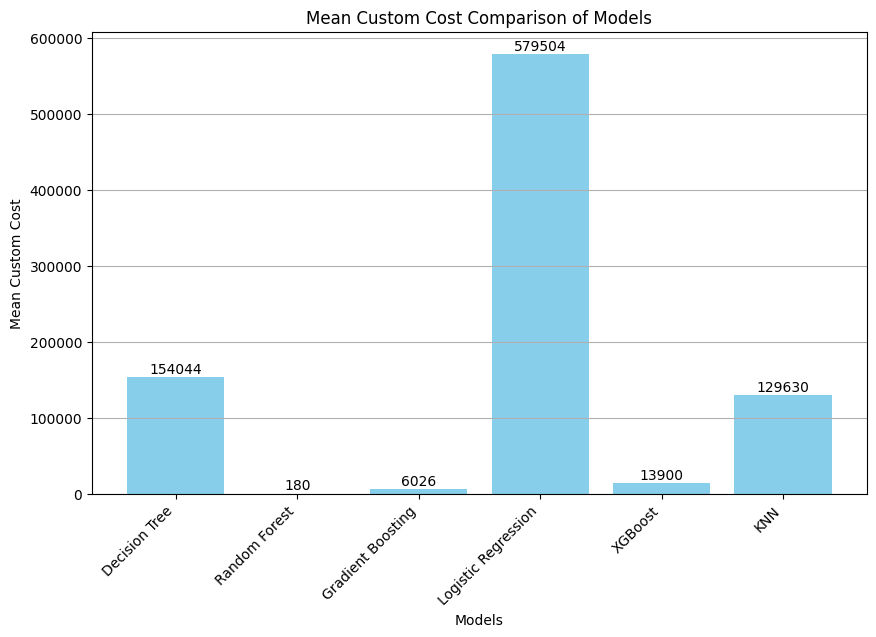

In [38]:
# Calculate mean "custom cost" for each model
mean_custom_costs = {model: np.mean([fold['scores']['Custom Cost'] for fold in folds.values()]) for model, folds in results_00.items()}

# Plot bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_custom_costs.keys(), mean_custom_costs.values(), color='skyblue')

# Add text annotations on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, str(round(bar.get_height())), 
             ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Mean Custom Cost')
plt.title('Mean Custom Cost Comparison of Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## <font color=blue>Conclusion</font>
It looks like that Random Forest Classifier is a clear winner in this analysis. It has near perfect precision, accuracy, recall and F1-score. In addition to that, it does very well in "custom-cost" metric as well. This is important because the custome cost function, in my opinion, penalizes False Negatives more than False Positives. Therefore the cost to the bank is somewhat correctly calculated becasue False Positives are penalized more than False Negatives. This cost is very low compared to all the other models, eventhough some of those models do a very good job on the other metrics. For example Gradient Boosting does a very good job on all the other metrics, and it would be hard to make a selection based on the other metrics, but custom cost helps us select Random Forest over Gradient Boosting classifier. 

**This Round's Winner**: Random Forest Classifier

**caveat:** I haven't done any hyper parameter tuning on this

## <font color=#9400d3>Feature Importance</font>
Feature importances are graphed below. Random Forest seems to have found more "relationships" or correlations among the features compared to Decision Tree as the last two features (repeat_retailer and used_chip) apparently have no importance in decision making of Decision Tree. The other models seem to not have this problem. 

Random Forest and Gradient Boosting have the same order of feature importances. However, Random Forest has more importance for ratio_to_median_purchase_price. online_order has more of an importance in Gradient Boosting model compared to Random Forest. XGBoost lists online_order as it's most important feature which seems a bit suspect. 

In [12]:
# Let's grab the feature names for feature importance analysis below
import pandas as pd
url = 'card_transdata.csv'

def grab_data(url, target, features=None):
    data = pd.read_csv(url)
    X = data.drop(target, axis=1)
    y = data[target]
    return X, y
X, y = grab_data(url, 'fraud')
feature_names = X.columns
feature_names

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')

/Users/aliesbak/Documents/GitHub/PlayGround/aimlenv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aliesbak/Documents/GitHub/PlayGround/aimlenv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


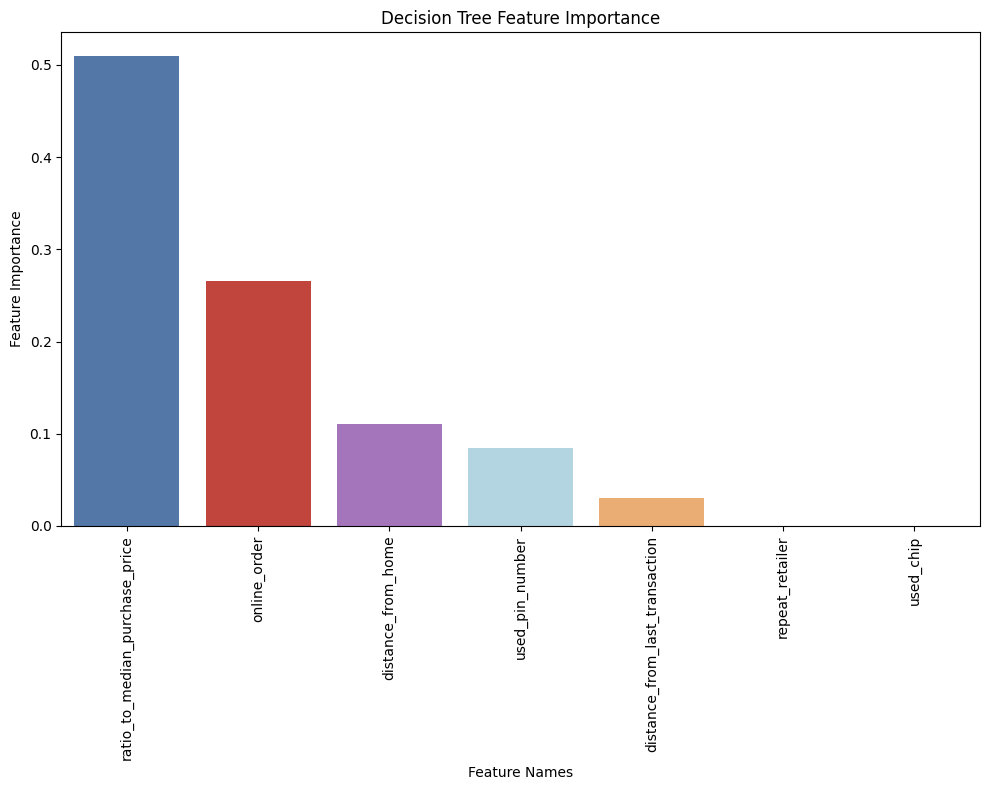

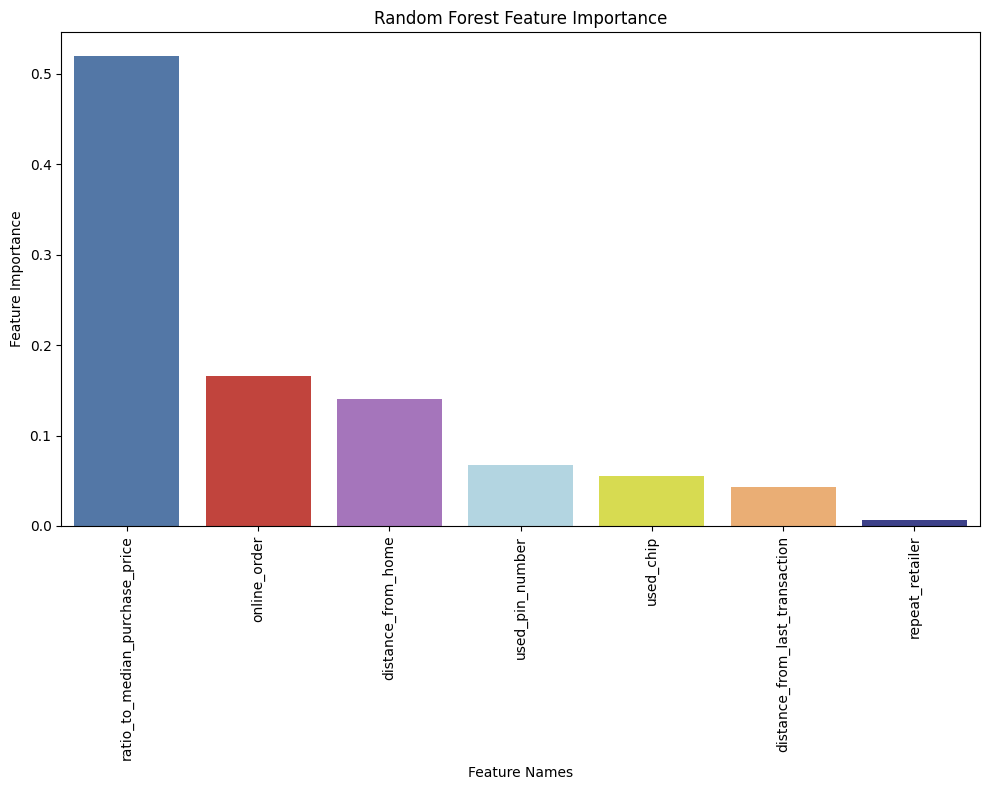

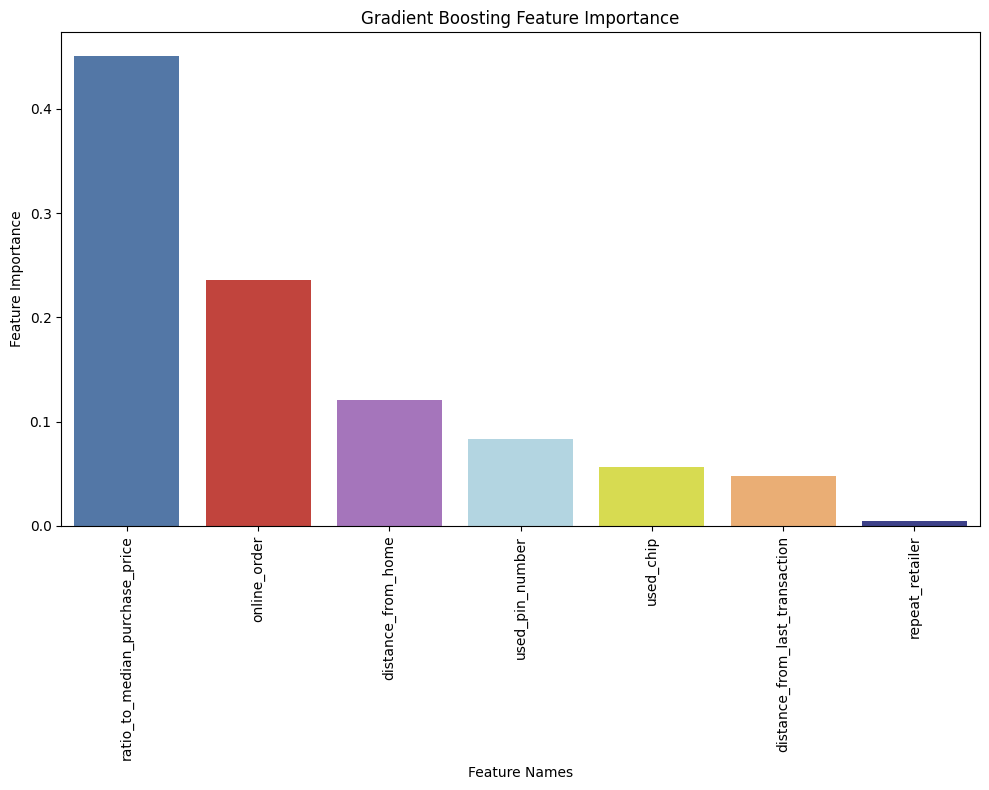

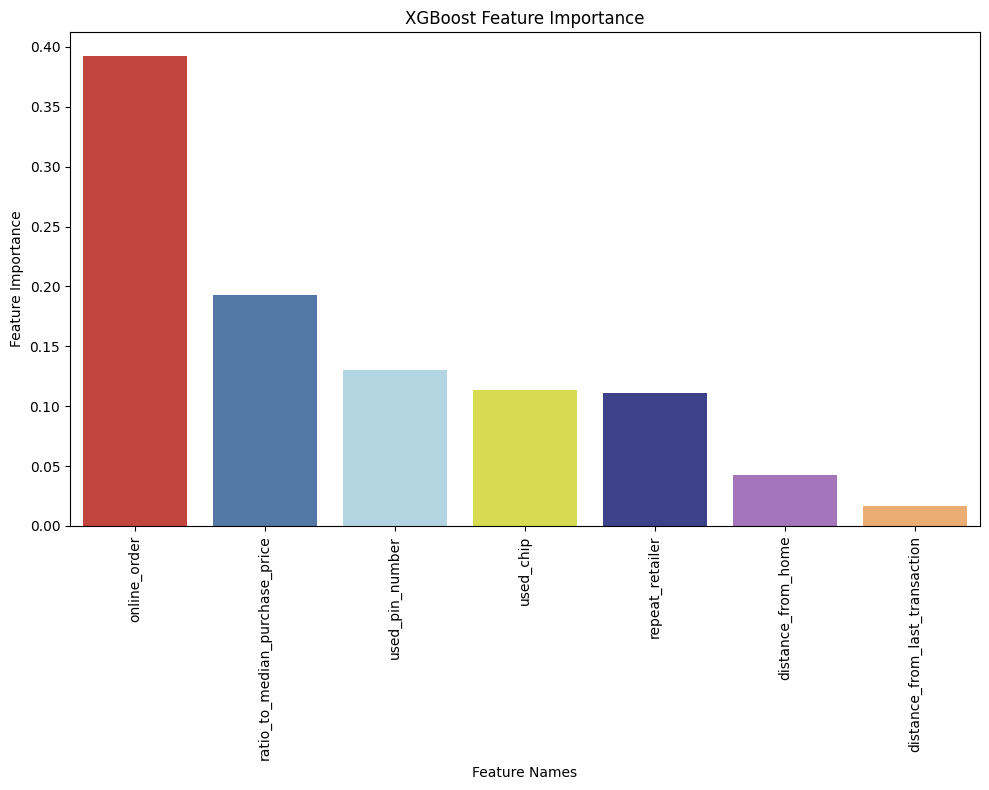

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Initialize dictionary to store mean feature importance for each model
mean_feature_importance = {}

# Feature names 
feature_names = np.array(X.columns)

# Iterate over models and calculate mean feature importance
for model, folds in results_00.items():
    feature_importance_list = []
    for fold, values in folds.items():
        try:
            feature_importance_list.append(values['model'].feature_importances_)
        except:
            pass
    mean_feature_importance[model] = np.mean(feature_importance_list, axis=0)

# popping Logistic Regression and KNN as they do not provide feature importances
mean_feature_importance.pop('Logistic Regression')
mean_feature_importance.pop('KNN')

# create a function here kinda like the first assignment to plot feature importances in descending order
def plot_feature_importance(model_name, feature_names, feature_importance):
    palette = {'distance_from_home':"#a969c7", 
               'distance_from_last_transaction':"#fdae61", 
               'ratio_to_median_purchase_price':"#4575b4", 
               'repeat_retailer':"#313695", 
               'used_chip':"#ecf23a", 
               'used_pin_number':"#abd9e9", 
               'online_order':"#d73027"}
    
    # create a data frame for graphing purposes
    data = {'feature_names' : feature_names, 'feature_importance': feature_importance}
    feature_importance_data_frame = pd.DataFrame(data=data)

    # I'll sort the data frame values for better visualization
    feature_importance_data_frame.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    # use seaborn to create a bar chart 
    plt.figure(figsize=(10,8))
    sns.barplot(y= feature_importance_data_frame["feature_importance"], 
                x= feature_importance_data_frame["feature_names"],
                hue= feature_importance_data_frame["feature_names"],
                palette=palette)
    # add title and chart labels
    plt.title(f"{model_name} Feature Importance")
    plt.xlabel("Feature Names")
    plt.ylabel("Feature Importance")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

for model_name, feature_importance_mean in mean_feature_importance.items():
    plot_feature_importance(model_name, feature_names, feature_importance_mean)


In [55]:
# here's a table of feature importances for each classifier
data = mean_feature_importance
df_skf_cv_results = pd.DataFrame(data, index=X.columns)
df_skf_cv_results

,Decision Tree,Random Forest,Gradient Boosting,XGBoost
distance_from_home,0.110860,0.140862,0.121003,0.042853
distance_from_last_transaction,0.029991,0.043509,0.048200,0.016530
ratio_to_median_purchase_price,0.509715,0.519872,0.450819,0.193072
repeat_retailer,0.000000,0.006473,0.005156,0.111292
used_chip,0.000000,0.055630,0.056123,0.113399
used_pin_number,0.084073,0.067341,0.083096,0.130238
online_order,0.265361,0.166312,0.235604,0.392616


#### <font color=blue>Final Thoughts</font>
What I wanted to do for this assignment but ran out of time for was using the models on the holdout set and compare resutls. I will perhaps do this after submitting the assignment. 

This was relatively a fun assignment. Thanks Paul and James. 